##### Libraries needed

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [93]:
df = pd.read_excel(r'C:\Users\bboul\OneDrive\Desktop\Projects\FeelState\Feel State Social\instagram_data\Corey_list_raw_Data.xlsx')

##### Shape of data this value is before we remove duplicates and null values. 

In [94]:

print("Rows: " +str(len(df.index)))
print("Columns: "+str(len(df.columns)))

Rows: 3675
Columns: 11


##### The total amount of duplicates in the data, followed by dropping those duplicates 

In [95]:
print("Duplicates: "+ str(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

Duplicates: 17


##### Now we create a loop to print null values in columns.  Some of these are accept as NULL for example some post did not include any hashtags. I will change them to No Hashtags

In [96]:
for i in df.columns:
    print(i)
    print(df[i].isnull().sum())
df['Hashtags'].fillna(value='No Hashtags', inplace=True)

Date
0
Time
0
Post
0
Caption
0
Hashtags
1598
Account Name
1
Likes
0
Caption Count
1
Hashtag Count
1
Percentile
0
Day of Week
0


##### The next line of code drops the one single value that has the Null Values

In [97]:

df.drop(df.loc[df['Hashtag Count'].isnull()].index, inplace= True)

In [98]:
for i in df.columns:
    print(i)
    print(df[i].isnull().sum())

Date
0
Time
0
Post
0
Caption
0
Hashtags
0
Account Name
0
Likes
0
Caption Count
0
Hashtag Count
0
Percentile
0
Day of Week
0


In [99]:

print("Rows: " +str(len(df.index)))
print("Columns: "+str(len(df.columns)))

Rows: 3657
Columns: 11


##### Next, I convert data types over to proper data types

In [100]:
df.dtypes

Date             datetime64[ns]
Time             datetime64[ns]
Post                     object
Caption                  object
Hashtags                 object
Account Name             object
Likes                    object
Caption Count           float64
Hashtag Count           float64
Percentile               object
Day of Week              object
dtype: object

##### Coverting Likes to numeric changing those that are not numeric to NULL values and dropping null values

In [101]:
df = df[pd.to_numeric(df['Likes'], errors='coerce').notnull()]


In [102]:
convert_dict = {
                'Likes': int,
                'Caption Count': int,
                'Hashtag Count': int,
                }

df= df.astype(convert_dict)
df.dtypes

Date             datetime64[ns]
Time             datetime64[ns]
Post                     object
Caption                  object
Hashtags                 object
Account Name             object
Likes                     int32
Caption Count             int32
Hashtag Count             int32
Percentile               object
Day of Week              object
dtype: object

In [103]:
df.head()

,Date,Time,Post,Caption,Hashtags,Account Name,Likes,Caption Count,Hashtag Count,Percentile,Day of Week
0,2022-07-09 06:09:16,2022-07-09 06:09:16,https://www.instagram.com/p/Cfw-nWipY80/,ðŸ™Œ,No Hashtags,Feel State KC,18,1,0,25%,Saturday
1,2021-12-08 00:08:15,2021-12-08 00:08:15,https://www.instagram.com/p/CXM4DoIOcZ3/,ðŸ¥´,No Hashtags,Lightshade High,40,1,0,25%,Wednesday
2,2022-07-19 02:35:05,2022-07-19 02:35:05,https://www.instagram.com/p/CgLWIA7svqN/,ðŸš–,No Hashtags,Lightshade High,47,1,0,50%,Tuesday
3,2022-07-22 11:47:57,2022-07-22 11:47:57,https://www.instagram.com/p/CgR6IMwsfBi/,ðŸ˜®,No Hashtags,Neta Now,49,1,0,50%,Friday
4,2019-05-09 17:18:35,2019-05-09 17:18:35,https://www.instagram.com/p/BxP_j9ul0PM/,ðŸ”¥ðŸŒ¹ðŸ’¨,No Hashtags,Superette,94,1,0,50%,Thursday


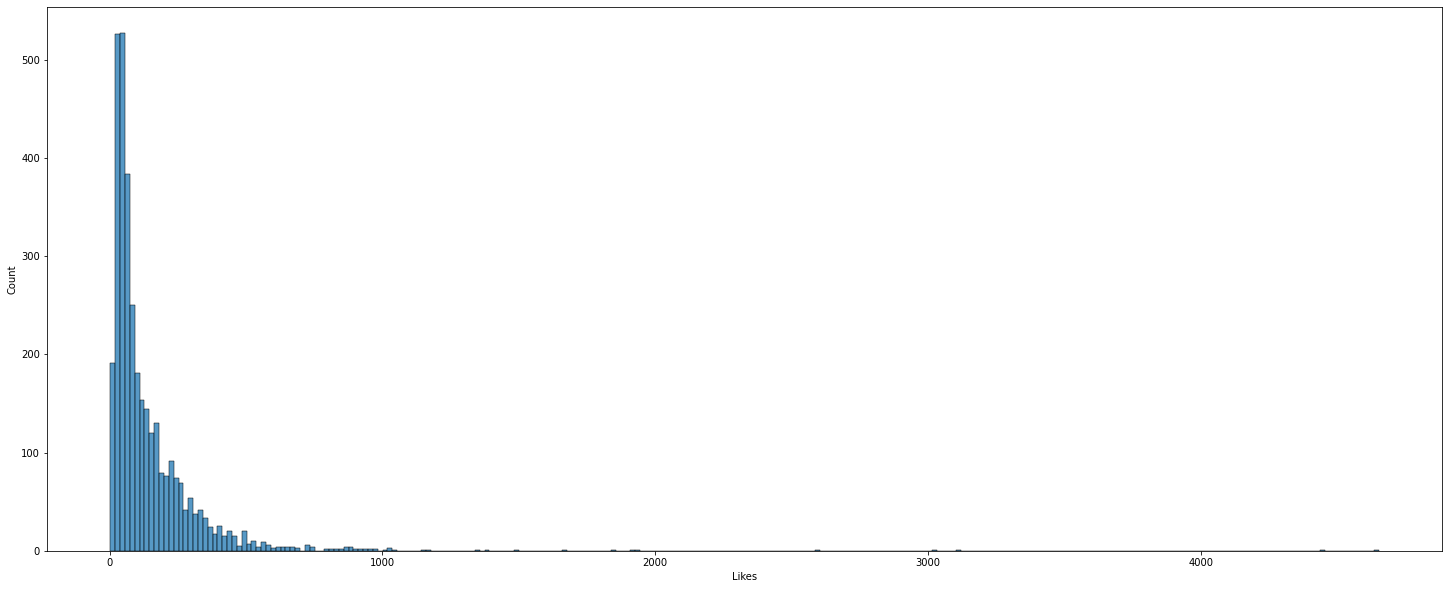

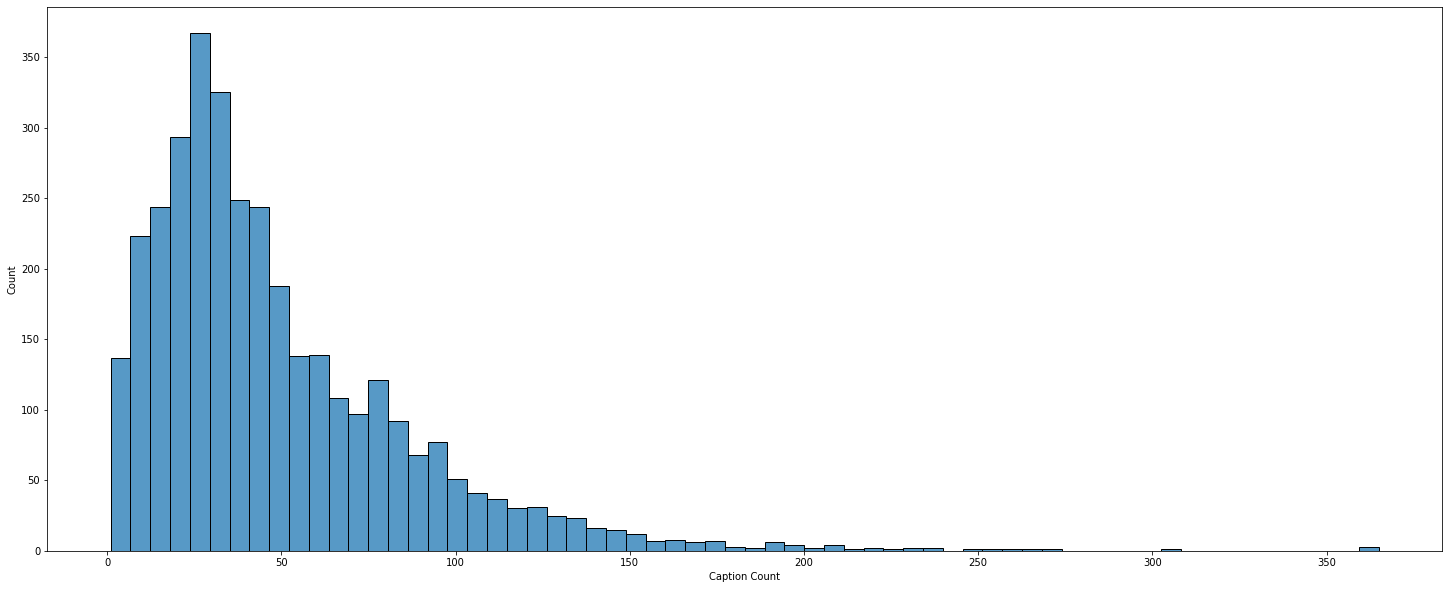

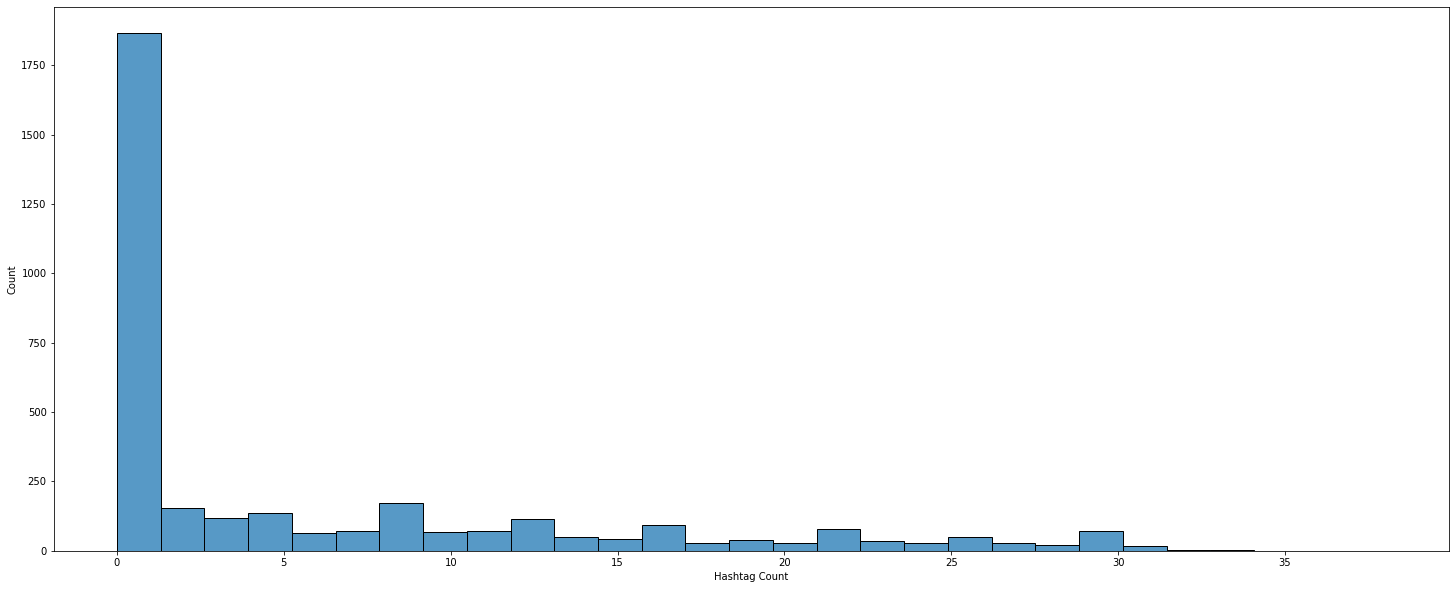

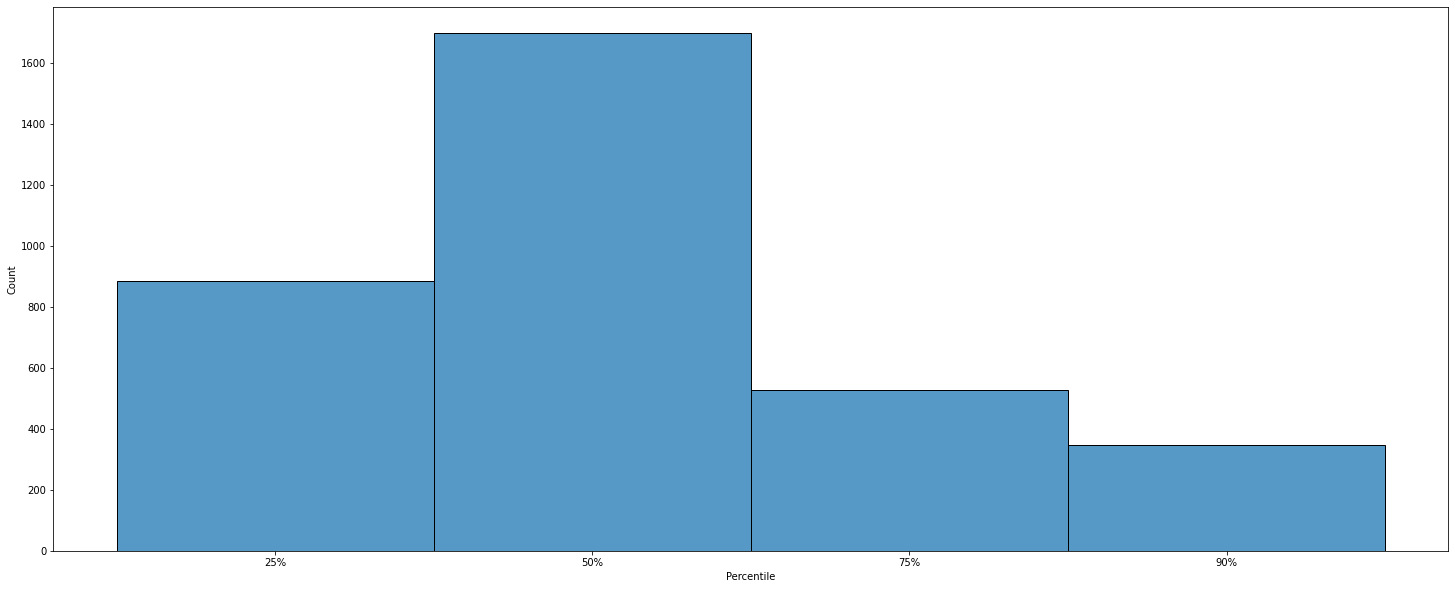

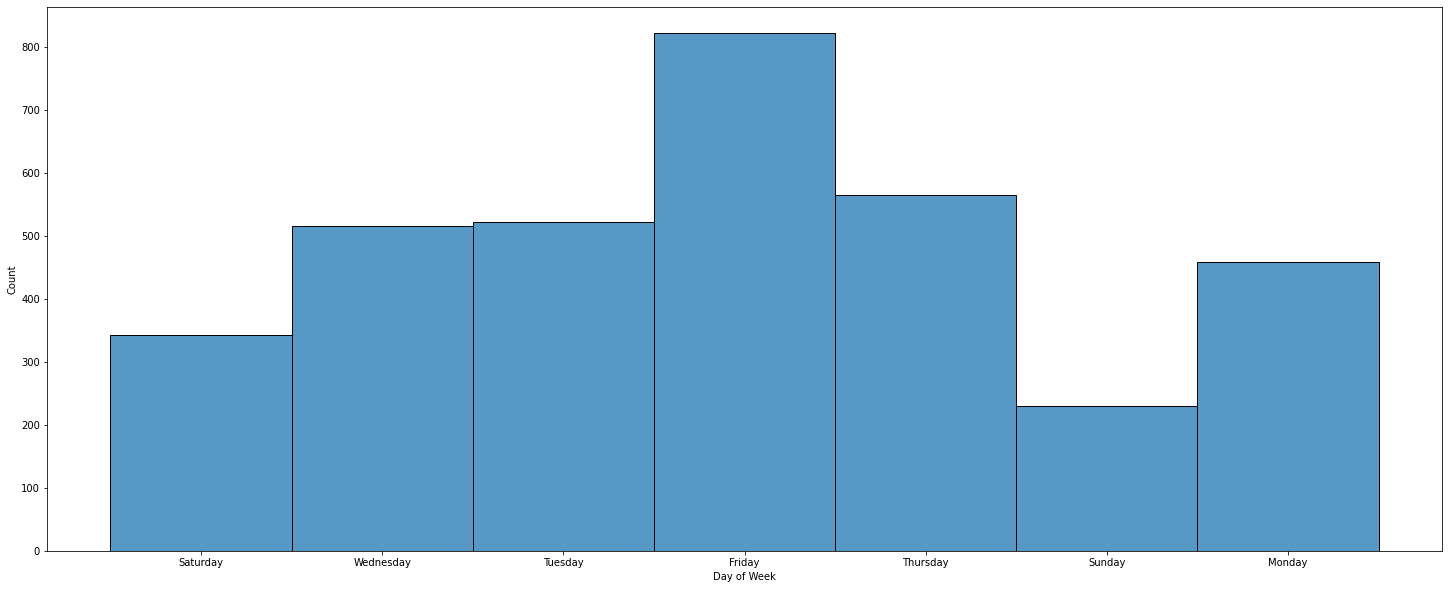

In [104]:
for i in df.columns[6:]:
    plt.figure(figsize=(25,10))
    sns.histplot(data=df , x=i)

#### These histograms show that the data is heavily skewed for Caption Word Count, Hashtag Count, and Likes

##### Below is a pairplot so we can see our data in multiple different representations quickly

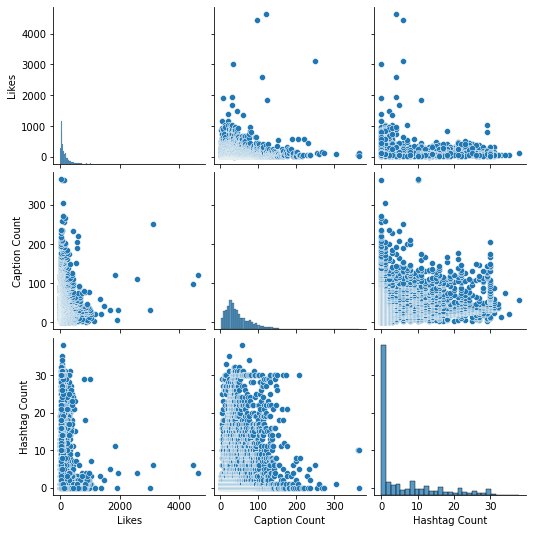

In [105]:
sns.pairplot(data=df)

##### Next, I created a heatmap showing correlation between numeric values

<AxesSubplot:>

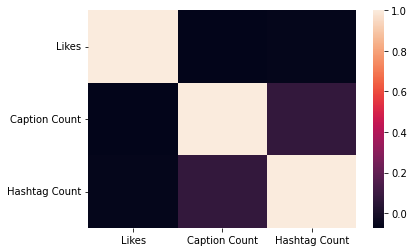

In [106]:
sns.heatmap(data=df.corr())

##### I also created a list of most frequently used words in the captions.  I will save running the captions through a word processing library for another time. 

In [141]:
stop_words = ['know','one','will','see','come','bio','cannabis', 'Must', 'years', 'u','old','least','content','link','new','view','us','day','week','today'] + list(STOPWORDS)
#filter the df to one candidate, and create a list of responses from them
day=df.groupby('Day of Week')
for i, data in day:
    print(i)
    day= ' '.join(data['Caption'].tolist())
    day =  re.sub(r'[^a-zA-Z0-9 ]', '', day)
    wordcloud = WordCloud(stopwords = stop_words, collocations=True).generate(day)
    #plt.imshow(wordcloud, interpolation='bilInear')
    #plt.axis('off')
    #plt.show()
    
    text_dictionary = wordcloud.process_text(day)
    # sort the dictionary
    word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

    #print results
    print(list(word_freq.items())[:10])
    print('\n')
          


Friday
[('certifiedqualifying patients', 202), ('Medical', 200), ('use', 105), ('patient', 84), ('certified', 82), ('Curio Wellness', 80), ('flower', 73), ('strain', 72), ('Maryland', 71), ('weekend', 69)]


Monday
[('flower', 44), ('patient', 43), ('Happy', 42), ('love', 38), ('strain', 35), ('PopUp', 35), ('Monday', 32), ('time', 32), ('Thank', 30), ('community', 30)]


Saturday
[('strain', 35), ('Harborside', 33), ('time', 32), ('patient', 31), ('Happy', 29), ('favorite', 29), ('Check', 29), ('Medical', 23), ('weekend', 21), ('yall', 21)]


Sunday
[('Harborside', 29), ('time', 23), ('Happy', 21), ('Thank', 20), ('help', 19), ('love', 18), ('PopUp', 18), ('oakland', 17), ('community', 16), ('CULTA', 16)]


Thursday
[('patient', 57), ('flower', 52), ('product', 49), ('strain', 41), ('time', 40), ('help', 37), ('Harborside', 37), ('favorite', 37), ('Check', 37), ('learn', 36)]


Tuesday
[('Medical', 48), ('patient', 48), ('Curio', 47), ('time', 43), ('flower', 42), ('Harborside', 39), 